In [6]:
from IPython.display import display, HTML, Javascript


html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
    
    <style>
    
.section2{
    Font-Family: 'Playfair Display', Serif;
    font-style: italic;
    font-weight: bold;
    background: #D9D874;
    color:black;
    text-align: center;
    font-size:30px;
    }
    
.section{
    Font-Family: 'Source Sans Pro', Sans-Serif;
    font-weight: bold;
    font-size:20px;
    color:#a02933;
}

.intro{
    Font-Family: 'Playfair Display', Serif;
    text-align:center;
    font-size:15px;
    color:#4e4151;
    letter-spacing:0.5px;
    
    display:fill;
    background-color:#dbba78;
    padding: 0.8em;
    
    border-style: solid;
    border-color:#4e4151;
    border-radius:10px;     
}

.final{
    Font-Family: 'Playfair Display', Serif;
    text-align:center;
    font-size:15px;
    color:#4e4151;
    letter-spacing:0.5px;
    
    display:fill;
    background-color:#dbba78;
    padding: 0.8em;
    
    border-style: dashed;
    border-color:#4e4151;
    border-radius:10px;     
}

mark {
  Font-Family: 'Playfair Display', Serif;
  font-style: italic;
  background: #a02933;
  font-weight: bold;
  color: #dbba78;
  text-align: center;
  font-size:25px;
  justify-content: center;
}

.intro2 {
       padding: 1rem;
       width: 600px;
       0 5px 15px 0 rgba(0,0,0,0.08);
       border-color:#4e4151;
       border-radius:5px;  
       border-style: dashed;
       background-color:#dbba78;
       font-size:15px;
       font-family: 'Playfair Display', Serif;
       font-weight: none;
       letter-spacing:0.5px;
       text-align: left;
       border-width: 2px;
       color: #4e4151;
  
}

hr { border: 0.2px solid #a02933;
           }
    
    
    </style>
    </head>
    
</html>
"""

HTML(html_contents)

In [8]:
from IPython.display import display, HTML, Javascript

# ----- Notebook Theme -----
color_map  = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]

prompt = color_map[-1]
main_color = color_map[3]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()


<div class="intro" id = "title"><h1>Competition Description</h1> In this dataset we have to predict the final prices of the houses from features given. The dataset cointains 79 explanatory variables. We will explore the data and apply Advanced regression techniques like random forest and gradient boosting. </div>

# <center> <span style="font-family:Playfair Display"> <span style="color:white;display:fill;border-radius:8px;background-color:#a02933;font-size:100%;font-weight: bold;color: #dbba78;font-style: italic;">ㅤ📕Importing Libraries & DataSetㅤ</span><a id="1"></a> 

In [14]:
# importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")

# importing custom matplotlib parameters for vizualizations
plt.rcParams['figure.figsize'] = (14,4)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams["font.family"] = "monospace";

# Color Palettes
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]

#importing Dataset
# If files are in the same directory
house = pd.read_csv("train.csv")
house_test = pd.read_csv("test.csv")



#checking dataset
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
#describe the data with some visual style by applying T = Transpose and style
house.describe().T.style.bar(subset=['mean'],color=colors[3]).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000



<div class="intro2">
    📌 Summary <br>
    <br> ‣ We imported the dataset <br> ‣ we also looked at info where we found out that there are 3 types of datatypes float64(3), int64(35), object(43)
    <br> ‣ we also saw the stats of data.

# <center> <span style="font-family:Playfair Display"> <span style="color:white;display:fill;border-radius:8px;background-color:#a02933;font-size:100%;font-weight: bold;color: #dbba78;font-style: italic;">ㅤ🔍Exploratory Data Analysisㅤ</span><a id="1"></a> 

<div class="section" > Target Variable

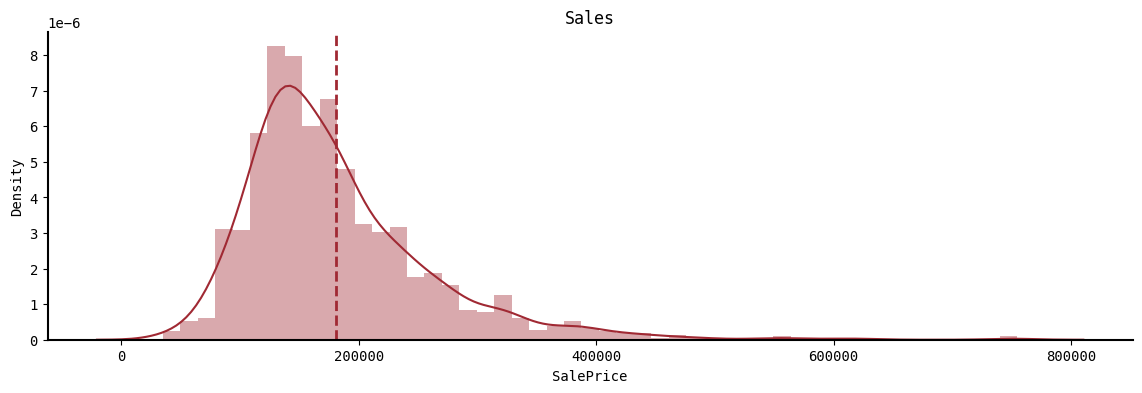

In [17]:
#checking the target variables for distribution
sns.distplot(house['SalePrice'],color=colors[7])
plt.axvline(x=house['SalePrice'].mean(), color=colors[7], linestyle='--', linewidth=2)
plt.title('Sales');

<div class="section" id = "title">Missing Values

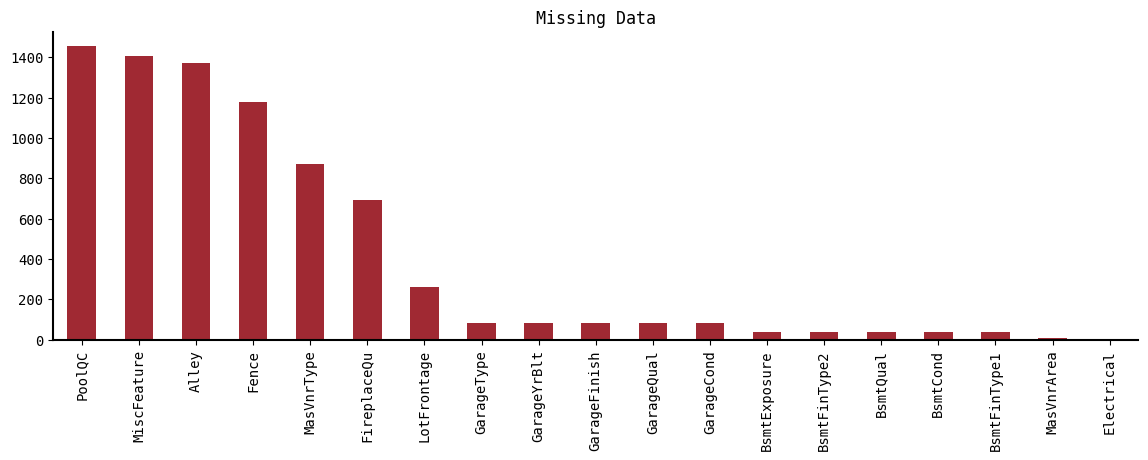

In [18]:
#checking missing values
missing = house.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar(color=colors[7])
plt.title('Missing Data');

<div class="intro2">‣ We can see that some of data got more than 50% missing data which is not good for training model.<br> ‣ I will drop those values and for those who are less than 50% we will try to fill them.

<div class="section" id = "title">Corelation

<Axes: >

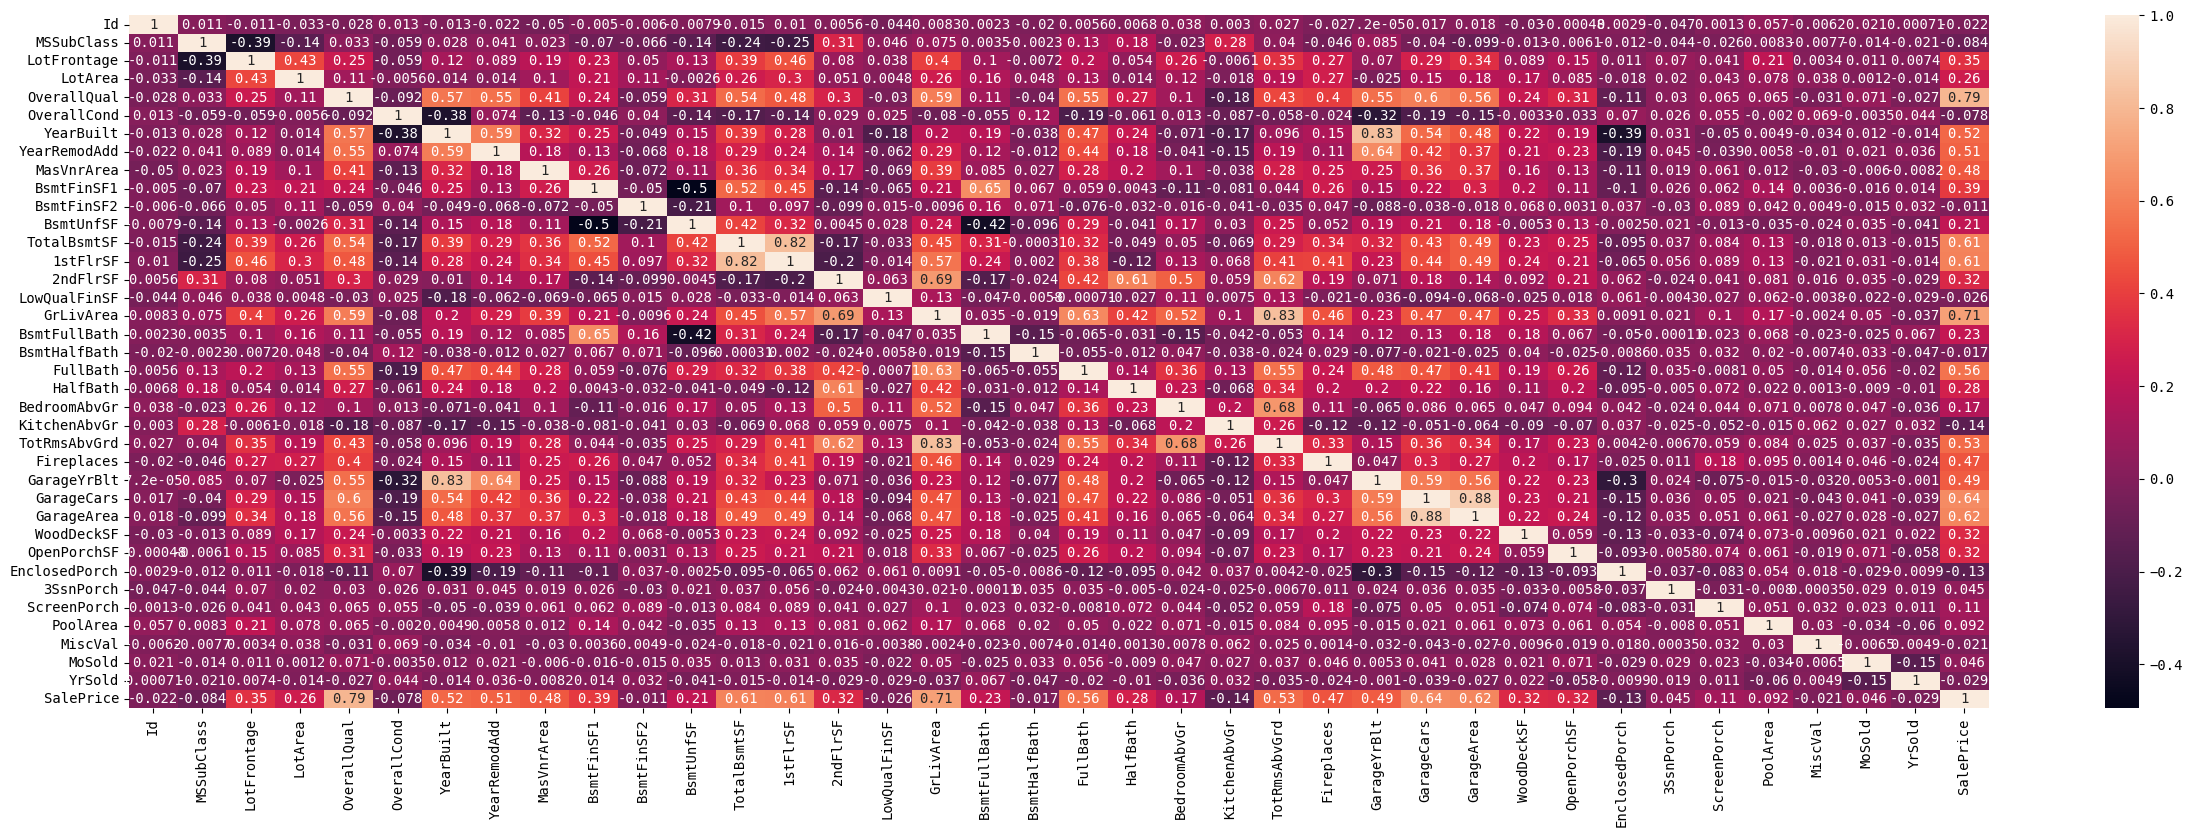

In [20]:
plt.figure(figsize=(30, 9))
sns.heatmap(house.corr(numeric_only=True), annot=True)


<div class="section" id = "title">Pre Processing</div>

In [21]:
# droping values more than 50%

y = house['SalePrice']
house = house.drop(['Id','Alley','PoolQC','Fence','MiscFeature','SalePrice'],axis=1)
house_test = house_test.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [22]:
num_cols = [col for col in house.columns if house[col].dtype in ['float64','int64']]
cat_cols = [col for col in house.columns if house[col].dtype not in ['float64','int64']]

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

house[num_cols] = SimpleImputer().fit_transform(house[num_cols])
house_test[num_cols] = SimpleImputer().fit_transform(house_test[num_cols])

house[num_cols] = MinMaxScaler().fit_transform(house[num_cols])
house_test[num_cols] = MinMaxScaler().fit_transform(house_test[num_cols])

In [26]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond',
                'MasVnrType','Electrical','MSZoning','Utilities','Functional','Exterior2nd','KitchenQual','Exterior1st','SaleType']
house[columns_None] = house[columns_None].fillna('none')
house_test[columns_None] = house_test[columns_None].fillna('none')

In [28]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(house[cat_cols])
encoded_cols = encoder.get_feature_names_out(cat_cols)

# Create DataFrame from encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=house.index)

# Drop old categorical columns and add encoded ones
house = pd.concat([house.drop(columns=cat_cols), encoded_df], axis=1)


In [29]:
house_test[encoded_cols] = encoder.transform(house_test[cat_cols])

# <center> <span style="font-family:Playfair Display"> <span style="color:white;display:fill;border-radius:8px;background-color:#a02933;font-size:100%;font-weight: bold;color: #dbba78;font-style: italic;">ㅤ🧮Model Selection and Predictingㅤ</span><a id="1"></a> 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
# After one-hot encoding
from sklearn.model_selection import train_test_split

# Combine numerical and encoded categorical columns
X = pd.concat([house[num_cols], encoded_df], axis=1)

# Now split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)


<div class="section" id = "title">Regression Models</div>

In [36]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [37]:
#making dictionary of models
models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [38]:
#taking results from the models
model_results = []
model_names = []

# training the model with function
for name,model in models.items():
    a = model.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    
print(df_results)

                   Model          RMSE
0                    SVR  84754.172435
3             ElasticNet  49514.228967
4           SGDRegressor  30989.134863
5          BayesianRidge  29419.317562
2                  Ridge  28593.593005
6       LinearRegression  28136.825268
7  RandomForestRegressor  27414.441845
1           XGBRegressor  26164.874164


<div class="intro2">‣ We tried multiple models but the best model was with lowest RMSE "XGB Regressor".
    <br>‣ Now the question arise how we can further reduce the error? we can reduce it by using hyper parameter tuning, but how to decide ? how to guess the best parameters?
    ‣ Lets do it in our next step.

# <center> <span style="font-family:Playfair Display"> <span style="color:white;display:fill;border-radius:8px;background-color:#a02933;font-size:100%;font-weight: bold;color: #dbba78;font-style: italic;">ㅤHyper Parameter Tuningㅤ</span><a id="1"></a> 

<div class="section" id = "title">Optuna

‣ Optuna is the framework for tuning prameters. you can read more about optuna <a href="https://optuna.org/" rel=" noreferrer nofollow">here.</a>

In [40]:
import optuna


'''

def objective(trial, data = inputs_df[numeric_cols + encoded_cols],target = targets):
    
    #x, y = inputs_df[numeric_cols + encoded_cols], targets
    X_train,X_test,y_train,y_test = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)
    param = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': trial.suggest_categorical('n_estimators', [1000,2000,3000,4000]),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = XGBRegressor(**param)  
    
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)
    preds_valid = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds_valid, squared=False)
    return rmse

    
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

study.best_params

'''

'\n\ndef objective(trial, data = inputs_df[numeric_cols + encoded_cols],target = targets):\n\n    #x, y = inputs_df[numeric_cols + encoded_cols], targets\n    X_train,X_test,y_train,y_test = train_test_split(\n    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)\n    param = {\n        \'tree_method\':\'gpu_hist\',  # this parameter means using the GPU when training our model to speedup the training process\n        \'lambda\': trial.suggest_loguniform(\'lambda\', 1e-3, 10.0),\n        \'alpha\': trial.suggest_loguniform(\'alpha\', 1e-3, 10.0),\n        \'colsample_bytree\': trial.suggest_categorical(\'colsample_bytree\', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),\n        \'subsample\': trial.suggest_categorical(\'subsample\', [0.4,0.5,0.6,0.7,0.8,1.0]),\n        \'learning_rate\': trial.suggest_categorical(\'learning_rate\', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),\n        \'n_estimators\': trial.suggest_categorical(\'n_estimators\', [1000,2000,3

In [41]:
#taking best params
best_params = {'lambda': 3.559040735218393,
 'alpha': 0.25772549522868987,
 'colsample_bytree': 0.6,
 'subsample': 0.5,
 'learning_rate': 0.014,
 'n_estimators': 4000,
 'max_depth': 11,
 'random_state': 24,
 'min_child_weight': 3}

In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np
from xgboost import XGBRegressor

# Applying it in the model
XGBR = XGBRegressor(**best_params)

XGBR.fit(X_train, y_train)
predicted = XGBR.predict(X_test)

# Manual RMSE calculation
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
print(f'Root Mean Square Error test = {rmse}')
#applying it in the model
# XGBR = XGBRegressor(**best_params)

# XGBR.fit(X_train, y_train)
# predicted = XGBR.predict(X_test)
# print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')

Root Mean Square Error test = 23401.94043236586


In [50]:
''' This is the parameter Iam using on my submission after multiple tries
XGBR = XGBRegressor(booster='gbtree', 
                    colsample_bylevel=1,
                    colsample_bynode=1, 
                    colsample_bytree=0.6,
                    gamma=0,
                    importance_type='gain', 
                    learning_rate=0.01, 
                    max_delta_step=0,
                    max_depth=4, 
                    min_child_weight=1.5, 
                    n_estimators=2400,
                    n_jobs=1, 
                    nthread=None, 
                    objective='reg:linear',
                    reg_alpha=0.6, 
                    reg_lambda=0.6, 
                    scale_pos_weight=1, 
                    silent=None, 
                    subsample=0.8, 
                    verbosity=1)

XGBR.fit(X_train,y_train)
predicted = XGBR.predict(X_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)})
'''

" This is the parameter Iam using on my submission after multiple tries\nXGBR = XGBRegressor(booster='gbtree', \n                    colsample_bylevel=1,\n                    colsample_bynode=1, \n                    colsample_bytree=0.6,\n                    gamma=0,\n                    importance_type='gain', \n                    learning_rate=0.01, \n                    max_delta_step=0,\n                    max_depth=4, \n                    min_child_weight=1.5, \n                    n_estimators=2400,\n                    n_jobs=1, \n                    nthread=None, \n                    objective='reg:linear',\n                    reg_alpha=0.6, \n                    reg_lambda=0.6, \n                    scale_pos_weight=1, \n                    silent=None, \n                    subsample=0.8, \n                    verbosity=1)\n\nXGBR.fit(X_train,y_train)\npredicted = XGBR.predict(X_test)\nprint(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=F

# <center> <span style="font-family:Playfair Display"> <span style="color:white;display:fill;border-radius:8px;background-color:#a02933;font-size:100%;font-weight: bold;color: #dbba78;font-style: italic;">ㅤ📦 Submissionㅤ</span><a id="1"></a> 

In [56]:
house_test[num_cols].shape, house_test[encoded_cols].shape

((1459, 36), (1459, 250))

In [ ]:
DD = num_cols + list(encoded_cols)
test_preds = XGBR.predict(house_test[DD])


In [59]:
print(test_preds)

[140187.92 175450.92 186935.84 ... 185171.92 131106.14 251597.03]


In [66]:
house.head()
x = house.iloc[5]
print(x)

MSSubClass               0.176471
LotFrontage              0.219178
LotArea                  0.059899
OverallQual              0.444444
OverallCond              0.500000
                           ...   
SaleCondition_AdjLand    0.000000
SaleCondition_Alloca     0.000000
SaleCondition_Family     0.000000
SaleCondition_Normal     1.000000
SaleCondition_Partial    0.000000
Name: 5, Length: 286, dtype: float64


In [67]:
print(XGBR.predict(x[num_cols + list(encoded_cols)].values.reshape(1, -1)))

[143057.03]


<div class="final">• Further we can try diffrent methonds or tweaks.<br>• as we dont have any domain knowlegde of the real state. <br>• we deleted some columns which have missing data more than 50% maybe start with it.